In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = 'Downloads/pcb_dataset_final.tsv'
df= pd.read_csv(file_path, sep = '\t')
df.head(20)

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,...,-1,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,...,423858,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,...,8879,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,...,-1,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072
5,4,93907,17686799,0,-1,-1,0,1,-1,-1,...,262565,30763035,9068207,9107790,29196072,32440044,1973606,2687461,29841067,21091108
6,4,19923387,31772643,0,-1,-1,0,0,-1,-1,...,179666,30763035,9312274,5028397,29196072,32440044,32440041,14074087,29196072,21091108
7,4,28451570,20843295,0,-1,-1,0,0,-1,-1,...,-1,138937,9312274,15403272,29196072,32440042,28928366,8556462,29196072,29196072
8,7,5588915,27491436,0,-1,-1,0,0,-1,-1,...,-1,138937,9312274,4281154,29196072,28928366,29196072,21857352,29196072,29196072
9,7,23074162,16184517,0,-1,-1,0,0,-1,-1,...,-1,28928366,26597095,7711526,29196072,3225250,1973606,17737135,9312274,29196072


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2                   int64  
 15  cat3                   int64  
 16  cat4                   int64  
 17  cat5                   int64  
 18  cat6                   int64  
 19  cat7                   int64  
 20  cat8                   int64  
 21  cat9                   int64  
dtypes: float64(2), i

In [3]:
df_criteo = df.copy()

In [4]:
df_criteo['timestamp_datetime'] = pd.to_datetime(df_criteo['timestamp'], unit='s', errors='coerce')

In [5]:
example2 = df_criteo[(df_criteo['uid']==1596386)]#&(df_criteo['conversion_timestamp']==3673484)]
example2

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,timestamp_datetime
6973712,1093676,1596386,6810200,1,1103649,20189940,0,1,0,1,...,28928366,9312274,27094388,23549932,11409684,1973606,13566642,14911188,18291872,1970-01-13 15:47:56


In [6]:
df_criteo_conversion = df_criteo[df_criteo['conversion']==1].reset_index()

In [7]:
print(df_criteo['uid'].nunique())
print(df_criteo['campaign'].nunique())

6142256
675


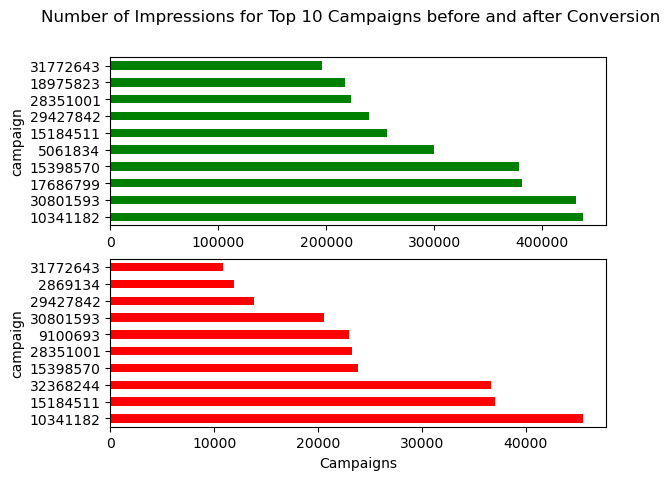

In [8]:
fig, ax = plt.subplots(2,1)
df_criteo['campaign'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',ax = ax[0], color = 'green')
df_criteo_conversion['campaign'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',ax = ax[1], color = 'red')
#plt.invert_yaxis()
plt.xlabel('Campaigns')
plt.suptitle('Number of Impressions for Top 10 Campaigns before and after Conversion')
plt.tight_layout
plt.show()

In [9]:
total_impressions = df_criteo['click'].count()
total_clicks = df_criteo['click'].sum()
ctr = total_clicks / total_impressions
print(f"Click-Through Rate (CTR): {ctr:.2%}")

Click-Through Rate (CTR): 36.12%


In [10]:
impressions = df_criteo_conversion.groupby('uid')['timestamp'].size().mean()
print(f'Average number of impressions before conversions are: {impressions:.2}')

Average number of impressions before conversions are: 2.5


616728.3122615344


<function matplotlib.pyplot.show(close=None, block=None)>

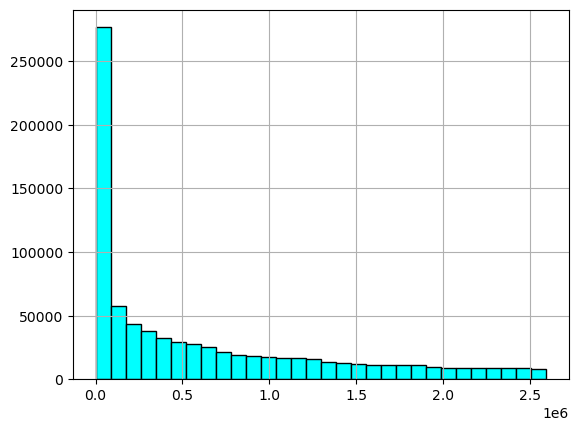

In [11]:
df_criteo_conversion['time_to_convert'] = df_criteo_conversion['conversion_timestamp'] - df_criteo_conversion['timestamp']
df_criteo_conversion['time_to_convert'].hist(bins=30, color = 'cyan', edgecolor='black')
print(df_criteo_conversion['time_to_convert'].mean())
plt.show

0.0002932555637021936


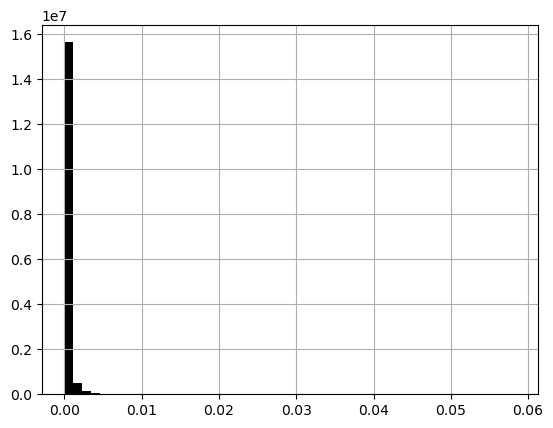

In [12]:
df_criteo['cost'].hist(bins=50, color = 'black')
print(df_criteo['cost'].mean())

In [13]:
avg_cost_conversion = df_criteo_conversion['cost'].mean()
avg_cost_no_conversion = df_criteo[df_criteo['conversion'] == 0]['cost'].mean()
print(f"Average cost of impressions that led to conversions: {avg_cost_conversion}")
print(f"Average cost of impressions that didn’t lead to conversions: {avg_cost_no_conversion}")

Average cost of impressions that led to conversions: 0.0009953406641042242
Average cost of impressions that didn’t lead to conversions: 0.00025711558750121736


In [14]:
for cat in range (1,10):
    cat_conversion_rates = df_criteo_conversion.groupby(f'cat{cat}')['conversion'].size().sort_values(ascending=False).head(5).reset_index(name='count')
    print(f'The conversion rates for cat{cat} are: ')
    print(cat_conversion_rates)

The conversion rates for cat1 are: 
       cat1   count
0  25259032  307702
1  30763035  193577
2  27093701  134509
3  28928366  122092
4    138937   23677
The conversion rates for cat2 are: 
       cat2   count
0   9312274  342643
1  26597095  143516
2   7477605   83241
3  28928366   58228
4  32440040   27987
The conversion rates for cat3 are: 
       cat3  count
0   8516481  31844
1  28051086  22538
2   2604912  21526
3  23322867  17609
4   1423188  14388
The conversion rates for cat4 are: 
       cat4   count
0  29196072  562267
1  23549932  136590
2  17152695   62056
3   6755486   22216
4  15743247   11307
The conversion rates for cat5 are: 
       cat5   count
0  32440044  208451
1   5824237  120728
2  11409684   95910
3  26611395   86760
4  11409686   66236
The conversion rates for cat6 are: 
       cat6   count
0   1973606  317503
1  29196072  195057
2  28928366  100690
3  30763035   35091
4  26597096   24267
The conversion rates for cat7 are: 
       cat7  count
0   9312274  56

   attribution  Total Number of Conversions
0            0                       363772
1            1                       442424


<function matplotlib.pyplot.show(close=None, block=None)>

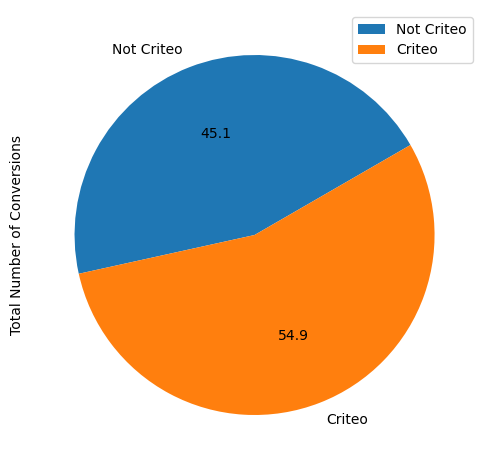

In [15]:
attribution = df_criteo_conversion.groupby('attribution').size().reset_index(name = 'Total Number of Conversions')
print(attribution)
attribution.plot(kind='pie',y = 'Total Number of Conversions', labels = ['Not Criteo', 'Criteo'], startangle = 30, autopct = '%1.1f')
plt.tight_layout()
plt.show

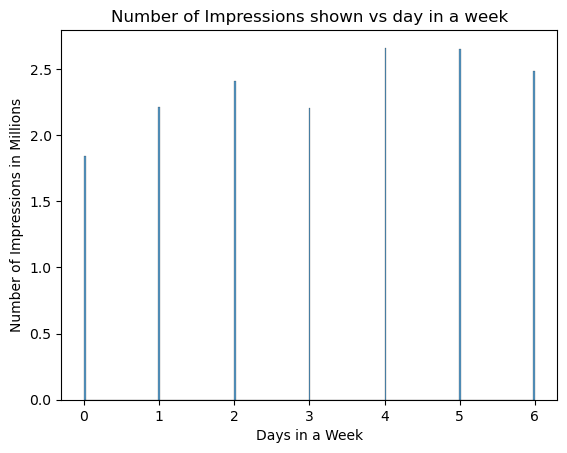

In [136]:
df_criteo['day_of_week'] = ((np.floor(df_criteo.timestamp / 86400) + 4) % 7).astype(int)
sns.histplot(data=df_criteo, x="day_of_week")
plt.title('Number of Impressions shown vs day in a week')
plt.xlabel('Days in a Week')
plt.ylabel('Number of Impressions in Millions')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'{y/1000000}'))
plt.show()

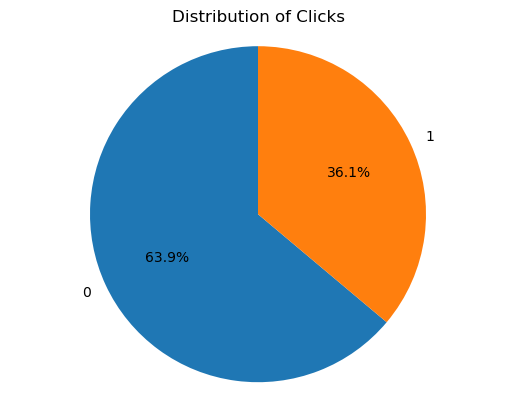

In [17]:
click_counts = df_criteo['click'].value_counts()

#plt.figure(figsize=(8, 8))
plt.pie(click_counts, labels=click_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clicks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



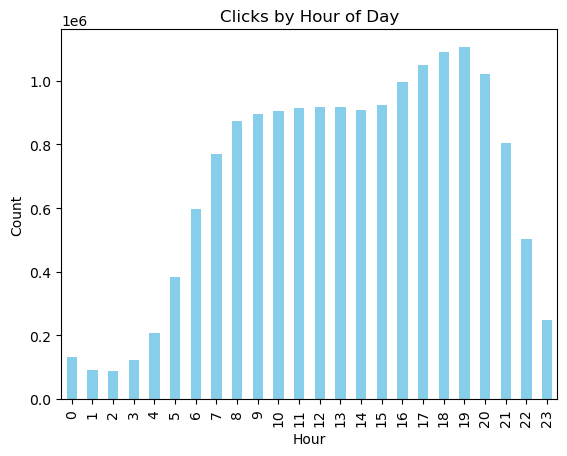

In [18]:
df_criteo['hour'] = df_criteo['timestamp_datetime'].dt.hour

#plt.figure(figsize=(12, 6))
df_criteo['hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Clicks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [19]:
# Calculate the total number of impressions (rows) per 'uid' from the full dataset
total_impressions = df_criteo.groupby('uid').size().reset_index(name='total_impressions')

# Filter out rows where 'conversion_id' is -1 to only consider positive conversions
filtered_data = df_criteo[df_criteo['conversion_id'] != -1]

# Calculate the number of unique positive 'conversion_id's for each user
unique_conversions = filtered_data.groupby('uid')['conversion_id'].nunique().reset_index(name='unique_conversion_count')

# Merge total impressions with unique conversion counts on 'uid'
unique_stats_df = pd.merge(total_impressions, unique_conversions, on='uid', how='left')

# Fill NaN values in 'unique_conversion_count' with 0 for users without any positive conversions
unique_stats_df['unique_conversion_count'] = unique_stats_df['unique_conversion_count'].fillna(0).astype(int)

# Calculate Conversion Rate (CR %) by dividing unique_conversion_count by total_impressions
unique_stats_df['CR %'] = (unique_stats_df['unique_conversion_count'] / unique_stats_df['total_impressions']) * 100

# Sort by 'CR %' in descending order and display the top 20 rows
top_20_unique_stats = unique_stats_df.sort_values(by='unique_conversion_count', ascending=False).head(20)

# Display the result
#print(top_20_unique_stats)

TP2 = top_20_unique_stats.sort_values(by='CR %', ascending= False)

print(TP2)

              uid  total_impressions  unique_conversion_count       CR %
5291995  27965139                 69                       50  72.463768
4817255  25457001                 43                       31  72.093023
3832760  20251710                 63                       45  71.428571
4980334  26316107                114                       72  63.157895
4554865  24067459                 78                       49  62.820513
1088462   5751511                 55                       34  61.818182
4866158  25714765                 52                       31  59.615385
1928436  10191610                 58                       34  58.620690
4903821  25911741                 55                       31  56.363636
1594106   8425454                 59                       31  52.542373
3241259  17129959                 64                       31  48.437500
3132984  16556370                115                       55  47.826087
184810     975564                 65               

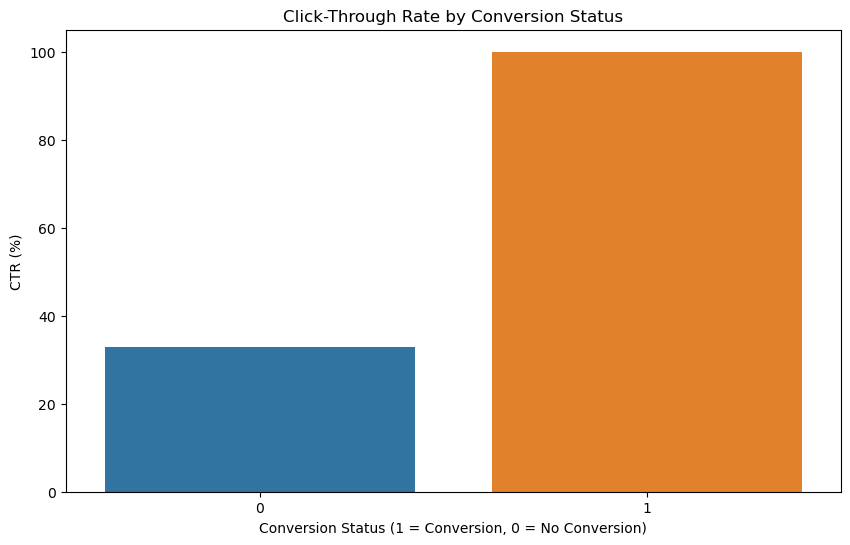

/var/folders/_7/0__0cx_j0lg1brf8hn5fry5c0000gn/T/ipykernel_17804/1897721050.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  click_time_data = df_criteo.groupby('click_time_bins').agg(total_impressions=('time_since_last_click', 'size'),
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


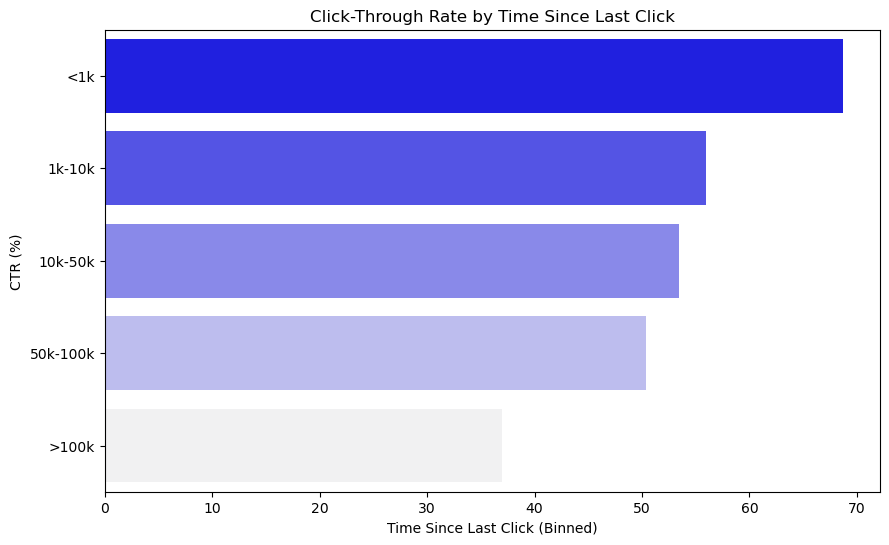

In [20]:
# 1. Click-Through Rate by Conversion (1 = Conversion, 0 = No Conversion)
conversion_data = df_criteo.groupby('conversion').agg(total_impressions=('conversion', 'size'),
                                                 total_clicks=('click', 'sum')).reset_index()

conversion_data['CTR'] = (conversion_data['total_clicks'] / conversion_data['total_impressions']) * 100

# Plotting CTR by conversion status
plt.figure(figsize=(10, 6))
sns.barplot(x='conversion', y='CTR', data=conversion_data)
plt.title('Click-Through Rate by Conversion Status')
plt.xlabel('Conversion Status (1 = Conversion, 0 = No Conversion)')
plt.ylabel('CTR (%)')
plt.show()

# 2. Click-Through Rate (CTR) by 'time_since_last_click'
df_criteo['click_time_bins'] = pd.cut(df_criteo['time_since_last_click'], bins=[-1, 1000, 10000, 50000, 100000, float('inf')], labels=['<1k', '1k-10k', '10k-50k', '50k-100k', '>100k'])

click_time_data = df_criteo.groupby('click_time_bins').agg(total_impressions=('time_since_last_click', 'size'),
                                                      total_clicks=('click', 'sum')).reset_index()

click_time_data['CTR'] = (click_time_data['total_clicks'] / click_time_data['total_impressions']) * 100

# Plotting CTR by time since last click
plt.figure(figsize=(10, 6))
sns.barplot(y='click_time_bins', x='CTR', data=click_time_data, color = 'blue', palette = 'light:b_r')
plt.title('Click-Through Rate by Time Since Last Click')
plt.xlabel('Time Since Last Click (Binned)')
plt.ylabel('CTR (%)')
plt.show()

Total Click Depth (Sum of Maximum Click NB per User): 814191
Total Number of Unique Conversion IDs: 435810


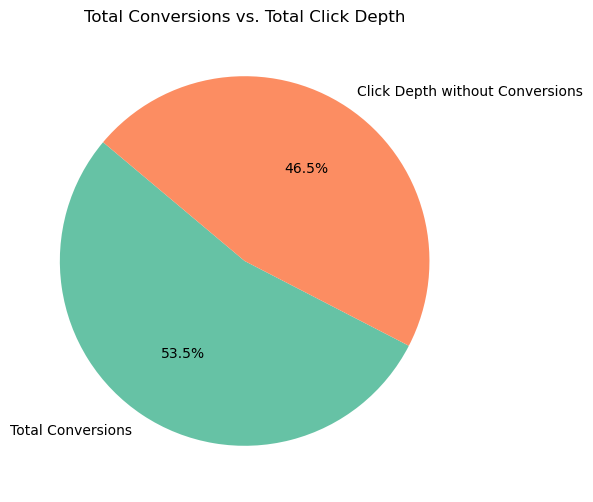

In [21]:
# Filter out rows where 'click_nb' is -1
filtered_data1 = df_criteo[df_criteo['click_nb'] > 0]

# Calculate the maximum 'click_nb' for each user (uid) from the filtered data
max_click_nb_per_user = filtered_data1.groupby('uid')['click_nb'].max()

# Sum of maximum click_nb across all users
total_click_depth = max_click_nb_per_user.sum()

# Calculate the total number of unique conversion IDs from the filtered data
total_unique_conversions = filtered_data1['conversion_id'].nunique()

# Display the results
print("Total Click Depth (Sum of Maximum Click NB per User):", total_click_depth)
print("Total Number of Unique Conversion IDs:", total_unique_conversions)

# Prepare data for the pie chart
click_depth_data = [total_unique_conversions, total_click_depth - total_unique_conversions]
labels = ['Total Conversions', 'Click Depth without Conversions']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(click_depth_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Total Conversions vs. Total Click Depth')
plt.show()

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
print(max(df['timestamp']))
print(min(df['timestamp']))

2671199
0


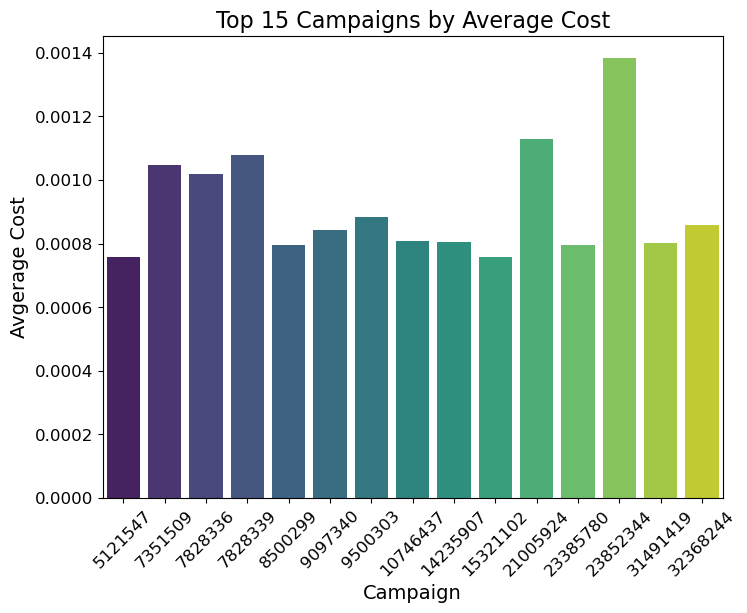

In [83]:
average_cost_per_campaign = df.groupby('campaign')['cost'].mean().reset_index()
top_15_campaign = average_cost_per_campaign.sort_values(by='cost', ascending=False).head(15).reset_index()
top_15_campaign = top_15_campaign.drop(columns = 'index').sort_values(by='cost')

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot with a gradient using Seaborn
sns.barplot(
    data=top_15_campaign,
    y='cost',
    x='campaign', 
    palette = 'viridis'
)

# Add titles and labels
plt.title('Top 15 Campaigns by Average Cost', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Avgerage Cost', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)

plt.show()



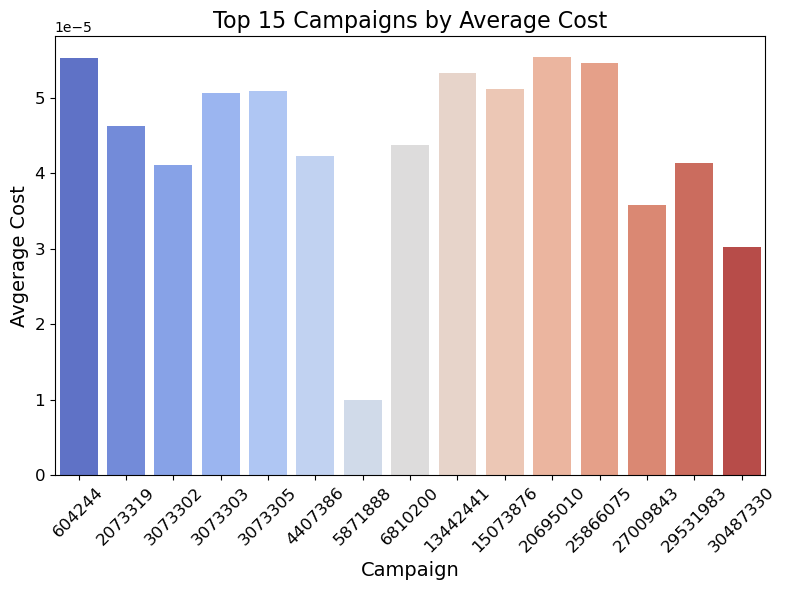

In [73]:
bottom_15_campaigns = average_cost_per_campaign.sort_values(by='cost', ascending=True).head(15)
bottom_15_campaigns
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_15_campaigns,
    y='cost',
    x='campaign', 
    palette = 'coolwarm'
)

# Add titles and labels
plt.title('Top 15 Campaigns by Average Cost', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Avgerage Cost', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
#ax = plt.gca()
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x*10000)}'))

# Show the plot
plt.tight_layout()
plt.show()

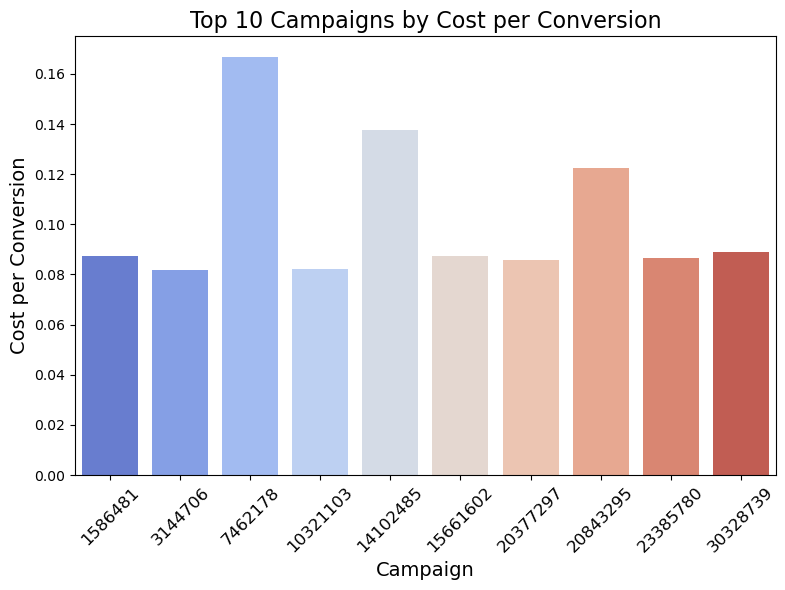

In [76]:
cost_per_conversion = (
    df.groupby('campaign')
    .agg(total_cost=('cost', 'sum'), conversion_count=('conversion', 'sum'))
    .reset_index()
)
cost_per_conversion['cost_per_conversion'] = cost_per_conversion['total_cost'] / cost_per_conversion['conversion_count']
#cost_per_conversion['cost_per_conversion'] = cost_per_conversion['cost_per_conversion'].fillna(0)
top_10 = cost_per_conversion.sort_values(by='cost_per_conversion', ascending=False).head(10)

# Plot Top 10 Campaigns
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10,
    y='cost_per_conversion',
    x='campaign', 
    palette = 'coolwarm'
)
plt.title('Top 10 Campaigns by Cost per Conversion', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Cost per Conversion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

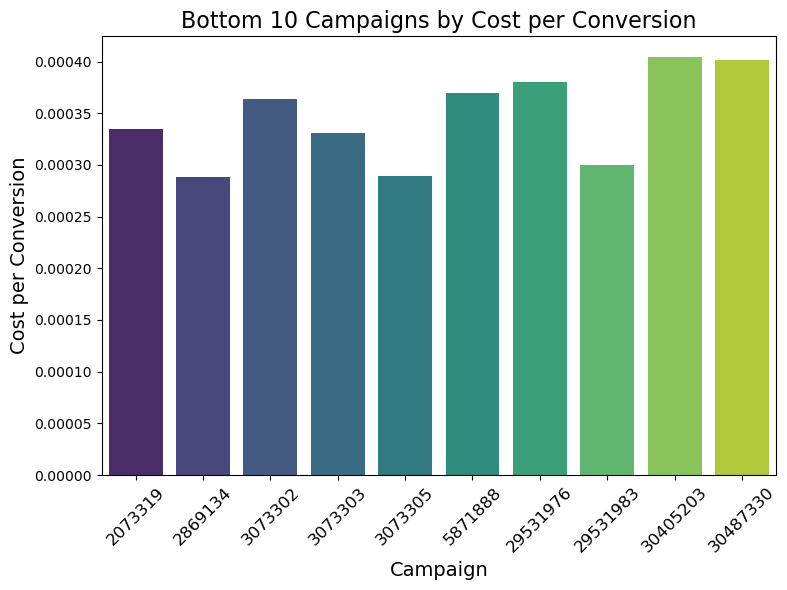

In [80]:
bottom_10 = cost_per_conversion.sort_values(by='cost_per_conversion', ascending=True).head(10)
# Plot Bottom 10 Campaigns
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_10,
    y='cost_per_conversion',
    x='campaign', 
    palette = 'viridis'
)
plt.title('Bottom 10 Campaigns by Cost per Conversion', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Cost per Conversion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [81]:
df['new_column'] = df[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']].astype(str).agg(''.join, axis=1)
df['new_column'].unique()

array(['58242339312274349027829196072114096861973606251628842919607229196072',
       '307630359312274145844822919607211409686197360622644417931227421091111',
       '13893793122741076984129196072582423713893717954512919607215351056',
       ...,
       '3076303593122741076984029196072582423730763035323454112919607221091108',
       '3076303526597095131130522919607258242363076303518391143291960728661623',
       '307630355824235295427512919607258242372919607236967772919607221091111'],
      dtype=object)

In [82]:
df['new_column'].value_counts()

new_column
931227429196072545841629196072114096842919607293122742919607229196072     14155
9312274291960722789443929196072324400472919607293122742919607229196072    13705
9312274291960722492249629196072114096862919607293122742919607229196072     8943
9312274291960722492249629196072114096862892836693122742919607229196072     8722
564294093122742369517429196072324400422919607293122742919607229196072      7649
                                                                          ...  
30763035582423712435261291960725824237197360621735040582423329196072          1
2892836628928366131753742919607258242371973606275942812075414421748261        1
3076303593122742631023829196072266113941973606202956062984106721091111        1
28928366931227411923468551393244004419736069312274324400448661623             1
307630355824235295427512919607258242372919607236967772919607221091111         1
Name: count, Length: 4471925, dtype: int64

In [84]:
data=df.copy()

In [95]:
data['cat_combination'] = pd.factorize(df['new_column'])[0] + 1
#columns_to_drop = ['new_column_factored']
#data = data.drop(columns=columns_to_drop)
data

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat_combination
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,0.000010,0.390794,-1,1
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,0.000010,0.059600,423858,2
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,0.000183,0.149706,8879,3
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,0.000094,0.154785,-1,4
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,0.000032,0.037583,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468022,2671199,5767906,4869923,0,-1,-1,0,1,-1,-1,0.000024,0.105551,482560,4471924
16468023,2671199,6852682,10002432,0,-1,-1,0,0,-1,-1,0.000031,0.152418,971748,4471914
16468024,2671199,16638720,7061828,0,-1,-1,0,0,-1,-1,0.000067,0.189066,268431,4471925
16468025,2671199,3032300,5061834,0,-1,-1,0,1,-1,-1,0.000050,0.301084,-1,54301


1148


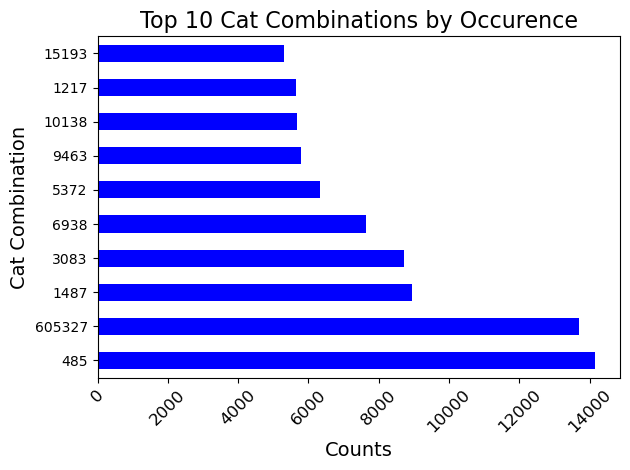

In [130]:
value_counts = data['cat_combination'].value_counts()
print(value_counts.nunique())
# Get the top 10 highest occurring values
top_10 = value_counts.head(10).plot(kind='barh',color='blue')
plt.title('Top 10 Cat Combinations by Occurence', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Cat Combination', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

142


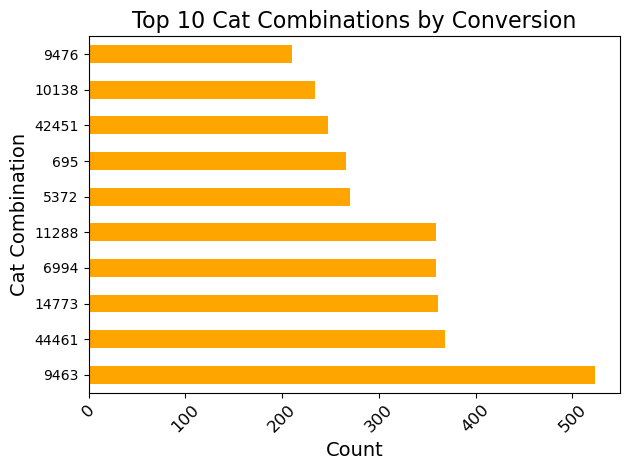

In [129]:
data_conversion = data[data['conversion']==1]
value_counts_conversion = data_conversion['cat_combination'].value_counts()
# Get the top 10 highest occurring values leading to conversion. 
top_10_conversion = value_counts_conversion.head(10).plot(kind='barh', color='orange')
print(value_counts_conversion.nunique())
plt.title('Top 10 Cat Combinations by Conversion', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Cat Combination', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

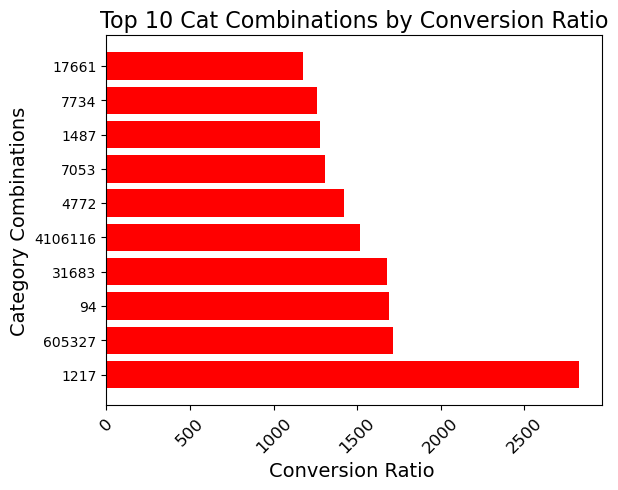

In [131]:
conversion_ratio_cat = value_counts/value_counts_conversion
conversion_ratio_cat = conversion_ratio_cat.reset_index().sort_values('count',ascending=False).head(10)
conversion_ratio_cat['cat_combination']=conversion_ratio_cat['cat_combination'].astype(str)
plt.barh(conversion_ratio_cat['cat_combination'], conversion_ratio_cat['count'], color = 'red')
plt.title('Top 10 Cat Combinations by Conversion Ratio', fontsize=16)
plt.xlabel('Conversion Ratio ', fontsize=14)
plt.ylabel('Category Combinations', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [137]:
user_campaign_exposure = data.groupby(['timestamp', 'uid'])['campaign'].nunique().reset_index()

# Filter to get rows where a user is exposed to more than one campaign at the same timestamp
multiple_campaign_exposure = user_campaign_exposure[user_campaign_exposure['campaign'] > 1]

# Display users exposed to multiple campaigns
print("Users exposed to multiple campaigns at the same timestamp:")
print(multiple_campaign_exposure)

Users exposed to multiple campaigns at the same timestamp:
          timestamp       uid  campaign
2372           1623  28613258         2
2377           1627  21075149         2
6056           5302  22297273         2
8411           8352   7016770         2
16664         16212   1272788         2
...             ...       ...       ...
16456465    2670312   3408470         2
16456818    2670379   6262492         2
16456877    2670390  26174487         2
16458260    2670656  22502526         2
16458875    2670770  12421721         3

[6931 rows x 3 columns]


In [139]:
# Group by 'timestamp' and 'uid' and aggregate the campaigns into a list
user_campaign_exposure = data.groupby(['timestamp', 'uid'])['campaign'].agg(list).reset_index()

# Filter to get rows where a user is exposed to more than one campaign at the same timestamp
multiple_campaign_exposure = user_campaign_exposure[user_campaign_exposure['campaign'].map(len) > 1]

# Display users exposed to multiple campaigns with campaign lists
print("Users exposed to multiple campaigns at the same timestamp:")
print(multiple_campaign_exposure)

Users exposed to multiple campaigns at the same timestamp:
          timestamp       uid                       campaign
2372           1623  28613258           [16491630, 23644447]
2377           1627  21075149            [13422843, 2576437]
6056           5302  22297273           [19602309, 12700454]
8411           8352   7016770           [17686799, 12289574]
16664         16212   1272788           [16506604, 30676243]
...             ...       ...                            ...
16456465    2670312   3408470            [6686704, 17435335]
16456818    2670379   6262492           [14661605, 17710664]
16456877    2670390  26174487           [17321082, 29534051]
16458260    2670656  22502526           [30427825, 28896342]
16458875    2670770  12421721  [27891651, 29874685, 6810192]

[6931 rows x 3 columns]


In [141]:
baseline_attribution = df_criteo_conversion.groupby('uid').size().sort_values(ascending=False)
baseline_attribution = baseline_attribution.reset_index(name = 'count')
filtered = baseline_attribution[baseline_attribution['count']>1]
#filtered

In [142]:
first_df = df_criteo_conversion.copy()
first_df['first_click_attribution']=0
df_criteo_first_touch = first_df[df_criteo_conversion['uid'].isin(filtered['uid'])]
first_touch=df_criteo_first_touch.sort_values(by = ['uid','conversion_id','timestamp'])
first_touch=first_touch.groupby(['uid','conversion_id'])
#first_touch.head()

In [143]:
def first_click(group):
    timestamp_min = group['timestamp'].min()
    group.loc[group['timestamp'] == timestamp_min, 'first_click_attribution'] = 1
    return group
first_impression = first_touch.apply(first_click)
first_impression = first_impression.set_index('index')
first_impression

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,cat3,cat4,cat5,cat6,cat7,cat8,cat9,timestamp_datetime,time_to_convert,first_click_attribution
index,,,,,,,,,,,,,,,,,,,,,
230533,45703,656,27777499,1,718877,26044415,0,1,0,3,...,21372185,23549932,11409686,32440041,27277949,29196072,21091108,1970-01-01 12:41:43,673174,1
2969912,474703,656,27777499,1,718877,26044415,0,1,1,3,...,21372185,30054645,11409686,5824238,27512348,29196072,21091111,1970-01-06 11:51:43,244174,0
3526397,554012,656,27777499,1,718877,26044415,0,1,2,3,...,21372185,29196072,11409686,3808271,20246687,29196072,29520629,1970-01-07 09:53:32,164865,0
10071621,1617199,999,5061834,1,4103933,14996161,0,1,0,4,...,28944165,29196072,26611392,29196072,5642940,29196072,29196072,1970-01-19 17:13:19,2486734,1
13272804,2135364,999,5061834,1,4103933,14996161,0,1,1,4,...,28944165,29196072,26611392,1973606,138937,29196072,8661623,1970-01-25 17:09:24,1968569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421271,65934,32458202,2576437,1,625696,26332147,0,1,14,17,...,30345721,29196072,32440044,1973606,3698652,9068204,9491354,1970-01-01 18:18:54,559762,0
2791049,454781,32458202,2576437,1,625696,26332147,0,1,15,17,...,30345721,29196072,32440044,1973606,3698652,20754144,21091111,1970-01-06 06:19:41,170915,0
3214390,497632,32458202,2576437,1,625696,26332147,0,1,16,17,...,30345721,29196072,32440044,1973606,3698652,29196072,9491354,1970-01-06 18:13:52,128064,0


In [144]:
example_datapoint = first_impression[first_impression['uid']==7306395]
example_datapoint

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,cat3,cat4,cat5,cat6,cat7,cat8,cat9,timestamp_datetime,time_to_convert,first_click_attribution
index,,,,,,,,,,,,,,,,,,,,,
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,12435261,23549932,5824237,1973606,9180723,29841067,29196072,1970-01-01 00:00:03,1449190,1
2364583,391213,7306395,29427842,1,1449193,3063962,0,1,1,7,...,12435261,23549932,5824237,1973606,9180723,29841067,21091111,1970-01-05 12:40:13,1057980,0
2684559,421106,7306395,29427842,1,1449193,3063962,0,1,2,7,...,12435261,23549932,5824237,1973606,9180723,23998111,9491351,1970-01-05 20:58:26,1028087,0
3303920,505427,7306395,29427842,1,1449193,3063962,0,1,3,7,...,12435261,15743247,5824237,1973606,16561097,3225256,29520629,1970-01-06 20:23:47,943766,0
5561827,858727,7306395,29427842,1,1449193,3063962,0,1,4,7,...,12435261,29196072,5824237,1973606,16561097,29841067,21091111,1970-01-10 22:32:07,590466,0
7370651,1160081,7306395,29427842,1,1449193,3063962,0,1,5,7,...,12435261,29196072,5824237,1973606,16561097,29841067,21091111,1970-01-14 10:14:41,289112,0
8801039,1380702,7306395,29427842,1,1449193,3063962,0,1,6,7,...,12435261,29196072,5824237,1973606,18079314,29841067,21091108,1970-01-16 23:31:42,68491,0
9236722,1458216,7306395,29427842,1,3673484,22468128,0,1,0,14,...,15435273,23549932,5824237,1973606,9180723,23998111,29520629,1970-01-17 21:03:36,2215268,1
9404811,1507601,7306395,29427842,1,3673484,22468128,0,1,1,14,...,15435273,23549932,5824237,1973606,8896233,23998111,9491354,1970-01-18 10:46:41,2165883,0


In [16]:
#first_touch_campaigns=first_impression.groupby('campaign').size().sort_values(ascending=False)
#print(first_touch_campaigns.head(50))
#first_touch_campaigns.head(50).plot(kind='bar')
#plt.title('Conversion Attribution on First Touch Attribution Model')
#plt.xticks([])
#plt.show

In [145]:
last_df = df_criteo_conversion.copy()
last_df['last_click_attribution']=0
df_criteo_last_touch = last_df[last_df['uid'].isin(filtered['uid'])]
last_touch=df_criteo_last_touch.sort_values(by = ['uid','conversion_id','timestamp'])
last_touch=last_touch.groupby(['uid','conversion_id'])
#last_touch.head()

In [146]:
def last_click(group):
    timestamp_max = group['timestamp'].max()
    group.loc[group['timestamp'] == timestamp_max, 'last_click_attribution'] = 1
    return group
    
last_impression = last_touch.apply(last_click)
last_impression = last_impression.set_index('index')
last_impression

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,cat3,cat4,cat5,cat6,cat7,cat8,cat9,timestamp_datetime,time_to_convert,last_click_attribution
index,,,,,,,,,,,,,,,,,,,,,
230533,45703,656,27777499,1,718877,26044415,0,1,0,3,...,21372185,23549932,11409686,32440041,27277949,29196072,21091108,1970-01-01 12:41:43,673174,0
2969912,474703,656,27777499,1,718877,26044415,0,1,1,3,...,21372185,30054645,11409686,5824238,27512348,29196072,21091111,1970-01-06 11:51:43,244174,0
3526397,554012,656,27777499,1,718877,26044415,0,1,2,3,...,21372185,29196072,11409686,3808271,20246687,29196072,29520629,1970-01-07 09:53:32,164865,1
10071621,1617199,999,5061834,1,4103933,14996161,0,1,0,4,...,28944165,29196072,26611392,29196072,5642940,29196072,29196072,1970-01-19 17:13:19,2486734,0
13272804,2135364,999,5061834,1,4103933,14996161,0,1,1,4,...,28944165,29196072,26611392,1973606,138937,29196072,8661623,1970-01-25 17:09:24,1968569,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421271,65934,32458202,2576437,1,625696,26332147,0,1,14,17,...,30345721,29196072,32440044,1973606,3698652,9068204,9491354,1970-01-01 18:18:54,559762,0
2791049,454781,32458202,2576437,1,625696,26332147,0,1,15,17,...,30345721,29196072,32440044,1973606,3698652,20754144,21091111,1970-01-06 06:19:41,170915,0
3214390,497632,32458202,2576437,1,625696,26332147,0,1,16,17,...,30345721,29196072,32440044,1973606,3698652,29196072,9491354,1970-01-06 18:13:52,128064,1


In [147]:
df_multi_linear = df_criteo_conversion.copy()
df_multi_linear['linear_attribution']=0
df_sorted= df_multi_linear[df_multi_linear['uid'].isin(filtered['uid'])]
df_sorted=df_sorted.sort_values(by = ['uid','conversion_id','timestamp'])
df_sorted=df_sorted.groupby(['uid','conversion_id'])
#df_sorted.head()

In [149]:
def linear_attribution(group):
    num_touchpoints = len(group)
    group['linear_attribution'] = 1 / num_touchpoints
    return group

df_linear_attribution = df_sorted.apply(linear_attribution)
df_linear_attribution.set_index('index')
linear_credit = df_linear_attribution.groupby('campaign')['linear_attribution'].sum().reset_index().sort_values(by='linear_attribution', ascending=False)

print("Linear Attribution Results:")
print(linear_credit)

Linear Attribution Results:
     campaign  linear_attribution
667  32368244             14849.0
217  10341182             14625.0
326  15184511             14380.0
200   9100693             10941.0
329  15398570              5939.0
..        ...                 ...
127   6341185                 2.0
390  18496278                 2.0
573  28328731                 2.0
282  13442441                 2.0
410  20443097                 1.0

[674 rows x 2 columns]


In [150]:
df_multi_time=df_criteo_conversion.copy()
df_multi_time['time_decay_attribution']=0
df_sorted_time= df_multi_time[df_multi_time['uid'].isin(filtered['uid'])]
df_sorted_time=df_sorted_time.sort_values(by = ['uid','conversion_id','timestamp'])
df_sorted_time=df_sorted_time.groupby(['uid','conversion_id'])
#df_sorted_time.head()

In [152]:
import numpy as np
def time_decay_attribution(group):
    group = group.sort_values(by='timestamp', ascending=False)
    weight = 0.5
    decay_weights = []
    for _ in range(len(group)):
        decay_weights.append(weight)
        weight = weight / 2  
    group['time_decay_attribution'] = decay_weights
    return group

df_time_decay = df_sorted_time.apply(time_decay_attribution)

df_time_decay = df_time_decay.reset_index(drop=True)

time_decay_data = df_time_decay.groupby('uid').apply(time_decay_attribution)
time_decay_credit = time_decay_data.groupby('campaign')['time_decay_attribution'].sum().reset_index().sort_values(by='time_decay_attribution', ascending=False)

print("\nTime Decay Attribution Results:")
print(time_decay_credit)


Time Decay Attribution Results:
     campaign  time_decay_attribution
217  10341182             6340.252816
326  15184511             5364.969502
667  32368244             4575.660900
200   9100693             3652.965681
329  15398570             3501.374183
..        ...                     ...
127   6341185                1.250000
390  18496278                1.250000
573  28328731                0.750000
282  13442441                0.750000
410  20443097                0.750000

[674 rows x 2 columns]


In [23]:
df_multi_custom=df_criteo_conversion.copy()
df_multi_custom['first_last_attribution']=0
df_sorted_custom= df_multi_custom[df_multi_custom['uid'].isin(filtered['uid'])]
df_sorted_custom=df_sorted_custom.sort_values(by = ['uid','conversion_id','timestamp'])
df_sorted_custom=df_sorted_custom.groupby(['uid','conversion_id'])

In [24]:
def custom_first_last_attribution(group):
    group = group.sort_values(by='timestamp')
    group['custom_attribution'] = 0.0
    first_click_index = group.index[0]  
    last_click_index = group.index[-1]  
    group.at[first_click_index, 'custom_attribution'] += 0.5
    group.at[last_click_index, 'custom_attribution'] += 0.5
    
    return group

df_custom_attribution = df_sorted_custom.apply(custom_first_last_attribution)

df_custom_attribution = df_custom_attribution.reset_index(drop=True)

df_custom_attribution


,index,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,...,cat3,cat4,cat5,cat6,cat7,cat8,cat9,time_to_convert,first_last_attribution,custom_attribution
0,230533,45703,656,27777499,1,718877,26044415,0,1,0,...,21372185,23549932,11409686,32440041,27277949,29196072,21091108,673174,0,0.5
1,2969912,474703,656,27777499,1,718877,26044415,0,1,1,...,21372185,30054645,11409686,5824238,27512348,29196072,21091111,244174,0,0.0
2,3526397,554012,656,27777499,1,718877,26044415,0,1,2,...,21372185,29196072,11409686,3808271,20246687,29196072,29520629,164865,0,0.5
3,10071621,1617199,999,5061834,1,4103933,14996161,0,1,0,...,28944165,29196072,26611392,29196072,5642940,29196072,29196072,2486734,0,0.5
4,13272804,2135364,999,5061834,1,4103933,14996161,0,1,1,...,28944165,29196072,26611392,1973606,138937,29196072,8661623,1968569,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615300,421271,65934,32458202,2576437,1,625696,26332147,0,1,14,...,30345721,29196072,32440044,1973606,3698652,9068204,9491354,559762,0,0.0
615301,2791049,454781,32458202,2576437,1,625696,26332147,0,1,15,...,30345721,29196072,32440044,1973606,3698652,20754144,21091111,170915,0,0.0
615302,3214390,497632,32458202,2576437,1,625696,26332147,0,1,16,...,30345721,29196072,32440044,1973606,3698652,29196072,9491354,128064,0,0.5
615303,6825863,1078474,32458592,8287704,1,1240667,16312783,1,1,0,...,28538391,29196072,11409686,1973606,9312274,20754144,29196072,162193,0,0.5


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

df_criteo_non_conversion = df_criteo[df_criteo['conversion'] == 0]

In [9]:
df_criteo_non_conversion_sample = df_criteo_non_conversion.sample(n=len(df_criteo_conversion), random_state=42)

df_criteo_balanced = pd.concat([df_criteo_conversion, df_criteo_non_conversion_sample])
df_criteo_balanced.drop(columns=['index'],inplace=True)
df_criteo_balanced

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
1,9,22258697,2869134,1,41,16096895,1,1,0,1,...,1659878,25259032,9312274,10664917,29196072,11409685,29196072,1001856,29196072,18291877
2,17,15394453,9100693,1,154,24795488,1,1,0,1,...,583864,25259032,5824236,4223617,23549932,26611395,1973606,11974250,29196072,8661623
3,25,6013772,15184511,1,138469,15587012,0,1,1,6,...,536,25259032,28928366,10089519,15743247,5824235,32440044,32081193,29196072,6083952
4,30,9451380,17321082,1,355909,4136014,0,1,1,3,...,363648,28928366,5824237,13175372,29196072,5824237,30763035,7230114,29196072,21091111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968199,2403648,19218441,25998433,0,-1,-1,0,0,-1,-1,...,-1,30763035,9312274,12599438,29196072,32440044,1973606,20695804,32440044,29196072
10657017,1702917,27780612,15398570,0,-1,-1,0,0,-1,-1,...,-1,138937,138937,4506847,29196072,32440044,1973606,14573904,32440044,29196072
8662980,1361427,27288953,9610626,0,-1,-1,0,0,-1,-1,...,-1,30763035,9312274,28551368,29196072,21611410,1973606,9312274,14911188,29196072
13662440,2210749,3782223,4869922,0,-1,-1,0,0,-1,-1,...,-1,30763035,9312274,12113062,29196072,5824236,5824239,8541691,29196072,29196072


In [11]:
df_criteo_sample = df_criteo_balanced.sample(frac=0.1, random_state=42) 

features = ['timestamp', 'click', 'attribution', 'cost', 'cpo', 'time_since_last_click']
X = df_criteo_sample[features]
y = df_criteo_sample['conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print(y_test, y_pred)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coefficients)


5703206     0
552336      1
9669649     0
736226      1
122371      1
           ..
591173      1
11917424    0
943500      0
10764394    0
8885683     0
Name: conversion, Length: 32248, dtype: int64 [0 0 1 ... 0 1 1]
ROC AUC Score: 0.9601035591355487
Logistic Regression Coefficients:
                 Feature  Coefficient
1                  click     4.708217
2            attribution     4.202621
3                   cost     0.715145
5  time_since_last_click     0.095086
0              timestamp     0.000843
4                    cpo    -0.755572


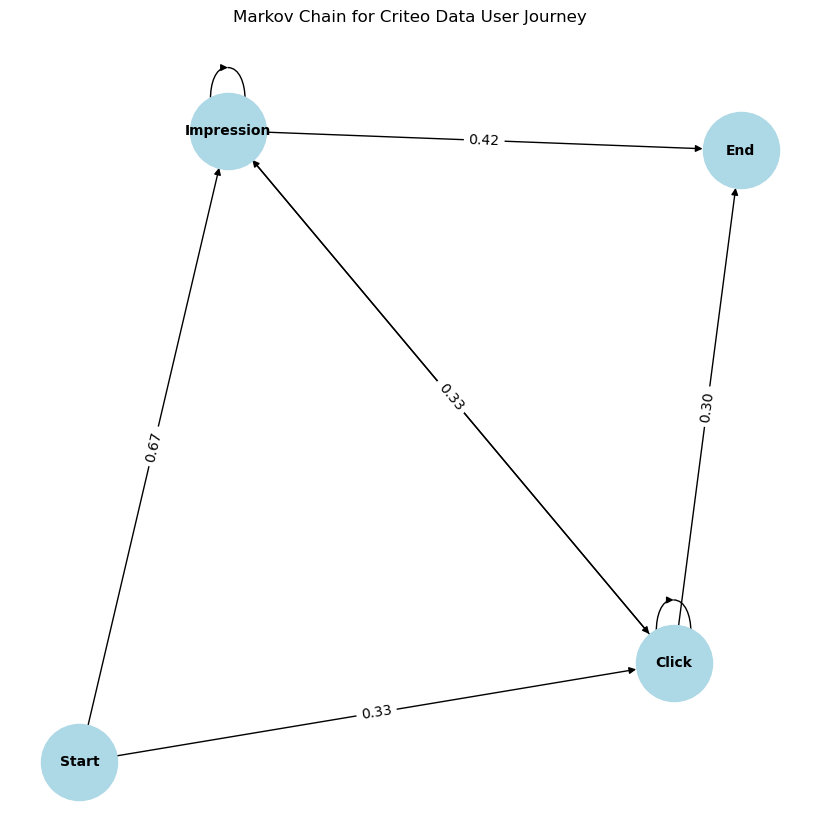

Removal Effect for Impression: 0.00
Removal Effect for Click: -0.45
Removal Effect for Conversion: 0.00

Attribution Credit for Each Touchpoint:
Impression: -0.00%
Click: 100.00%
Conversion: -0.00%


In [17]:
from collections import defaultdict
import networkx as nx

# Prepare the dataset for Markov Chain Attribution
# Define touchpoints: Impression, Click, Conversion
df_criteo2 = df_criteo.copy()
df_criteo2['touchpoint'] = df_criteo2.apply(lambda row: 'Click' if row['click'] == 1 else ('Conversion' if row['conversion'] == 1 else 'Impression'), axis=1)

# Group by 'uid' to get each user's journey
data_grouped = df_criteo2.groupby('uid')['touchpoint'].apply(list).reset_index()

# Insert 'Start' at the beginning and 'End' at the end of each journey, this is done to identify the probabilites between moving from a start point to an end point
data_grouped['touchpoint'] = data_grouped['touchpoint'].apply(lambda x: ['Start'] + x + ['End'])

# Build the transition matrix from touchpoints
transitions = defaultdict(int)

# Count transitions between touchpoints
for journey in data_grouped['touchpoint']:
    for i in range(len(journey) - 1):
        transitions[(journey[i], journey[i + 1])] += 1

# Convert to transition probabilities
total_transitions = defaultdict(int)
for (from_tp, to_tp), count in transitions.items():
    total_transitions[from_tp] += count

# Create a dictionary for transition probabilities
transition_probabilities = {}
for (from_tp, to_tp), count in transitions.items():
    transition_probabilities[(from_tp, to_tp)] = count / total_transitions[from_tp]

# Build the Markov chain using a graph representation (using networkx)
G = nx.DiGraph()

# Add edges and transition probabilities
for (from_tp, to_tp), prob in transition_probabilities.items():
    G.add_edge(from_tp, to_tp, weight=prob)

# Visualize the Markov chain
pos = nx.spring_layout(G)  # Layout for the nodes
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(n1, n2): f'{w:.2f}' for (n1, n2), w in edge_labels.items()})
plt.title("Markov Chain for Criteo Data User Journey")
plt.show()

# Calculate the "removal effect" for each touchpoint
# Removal effect is the difference in conversion probability when a touchpoint is removed

def removal_effect(transition_probabilities, touchpoint):
    # Recalculate transition probabilities without the given touchpoint
    modified_transitions = {k: v for k, v in transition_probabilities.items() if touchpoint not in k}
    
    # Build the Markov chain graph without the touchpoint
    G_removed = nx.DiGraph()
    for (from_tp, to_tp), prob in modified_transitions.items():
        G_removed.add_edge(from_tp, to_tp, weight=prob)
    
    # Calculate the likelihood of reaching 'End' from 'Start' in the modified graph
    removal_conversion_prob = nx.single_source_dijkstra_path_length(G_removed, 'Start', weight='weight').get('End', 0)
    
    # Original conversion probability
    original_conversion_prob = nx.single_source_dijkstra_path_length(G, 'Start', weight='weight').get('End', 0)
    
    # Removal effect is the difference
    return original_conversion_prob - removal_conversion_prob

# Calculate and display the removal effect for each touchpoint
touchpoints_to_check = ['Impression', 'Click', 'Conversion']  # Based on the dataset

for tp in touchpoints_to_check:
    effect = removal_effect(transition_probabilities, tp)
    print(f"Removal Effect for {tp}: {effect:.2f}")

# Assign attribution credit based on removal effect
# Higher removal effect means more credit to the touchpoint
attribution = {tp: removal_effect(transition_probabilities, tp) for tp in touchpoints_to_check}

# Normalize the attributions
total_effect = sum(attribution.values())
attribution = {k: v / total_effect for k, v in attribution.items()}

print("\nAttribution Credit for Each Touchpoint:")
for tp, credit in attribution.items():
    print(f"{tp}: {credit:.2%}")

In [28]:
df_criteo_campaign_ctr = df_criteo.groupby('campaign').agg(
    total_clicks=('click', 'sum'),
    total_impressions=('uid', 'size')
).reset_index()
df_criteo_campaign_ctr

,campaign,total_clicks,total_impressions
0,73322,222,735
1,73325,1511,5692
2,73327,1699,7395
3,73328,4218,12950
4,83677,12682,42678
...,...,...,...
670,32398755,8303,21474
671,32398758,4298,11209
672,32405311,1206,2576
673,32452108,3079,10145


In [29]:
df_criteo_campaign_ctr['CTR'] = df_criteo_campaign_ctr['total_clicks'] / df_criteo_campaign_ctr['total_impressions']
df_criteo_campaign_ctr

,campaign,total_clicks,total_impressions,CTR
0,73322,222,735,0.302041
1,73325,1511,5692,0.265460
2,73327,1699,7395,0.229750
3,73328,4218,12950,0.325714
4,83677,12682,42678,0.297155
...,...,...,...,...
670,32398755,8303,21474,0.386654
671,32398758,4298,11209,0.383442
672,32405311,1206,2576,0.468168
673,32452108,3079,10145,0.303499


In [30]:
campaign_first_click = first_impression.groupby('campaign')['first_click_attribution'].sum().reset_index()
campaign_last_click = last_impression.groupby('campaign')['last_click_attribution'].sum().reset_index()
campaign_linear = df_linear_attribution.groupby('campaign')['linear_attribution'].sum().reset_index()
campaign_time_decay = df_time_decay.groupby('campaign')['time_decay_attribution'].sum().reset_index()
campaign_custom = df_custom_attribution.groupby('campaign')['custom_attribution'].sum().reset_index()

df_campaign_comparison = campaign_first_click.merge(campaign_last_click, on='campaign', how='outer')
df_campaign_comparison = df_campaign_comparison.merge(campaign_linear, on='campaign', how='outer')
df_campaign_comparison = df_campaign_comparison.merge(campaign_time_decay, on='campaign', how='outer')
df_campaign_comparison = df_campaign_comparison.merge(campaign_custom, on='campaign', how='outer')

df_campaign_comparison = df_campaign_comparison.fillna(0)

print(df_campaign_comparison.head())

   campaign  first_click_attribution  last_click_attribution  \
0     73322                       28                      28   
1     73325                      140                     140   
2     73327                      358                     358   
3     73328                      377                     377   
4     83677                       95                      95   

   linear_attribution  time_decay_attribution  custom_attribution  
0                28.0               16.250000                28.0  
1               140.0               88.894531               140.0  
2               358.0              203.453125               358.0  
3               377.0              233.507812               377.0  
4                95.0               71.074218                95.0  


In [31]:
df_campaign_comparison = df_campaign_comparison.merge(df_criteo_campaign_ctr[['campaign', 'CTR']], on='campaign', how='left')
df_campaign_comparison.sort_values(by='CTR', ascending=False)

,campaign,first_click_attribution,last_click_attribution,linear_attribution,time_decay_attribution,custom_attribution,CTR
633,30534043,392,392,392.0,278.224365,392.0,0.738297
279,13365547,1284,1284,1284.0,955.954817,1284.0,0.724778
626,30405203,967,967,967.0,697.566996,967.0,0.693822
265,12843316,166,166,166.0,129.599358,166.0,0.677752
243,11959615,386,386,386.0,303.832736,386.0,0.677370
...,...,...,...,...,...,...,...
37,2144729,93,93,93.0,57.562500,93.0,0.112275
259,12513174,11,11,11.0,7.312500,11.0,0.104083
573,28328731,2,2,2.0,1.000000,2.0,0.098979
390,18496278,2,2,2.0,1.250000,2.0,0.092837


In [32]:
correlation_with_ctr = df_campaign_comparison[['CTR', 'first_click_attribution', 'last_click_attribution', 'linear_attribution', 'time_decay_attribution', 'custom_attribution']].corr()

print("Correlation with CTR:")
print(correlation_with_ctr)

Correlation with CTR:
                              CTR  first_click_attribution  \
CTR                      1.000000                 0.141794   
first_click_attribution  0.141794                 1.000000   
last_click_attribution   0.141794                 1.000000   
linear_attribution       0.141794                 1.000000   
time_decay_attribution   0.153993                 0.995330   
custom_attribution       0.141794                 1.000000   

                         last_click_attribution  linear_attribution  \
CTR                                    0.141794            0.141794   
first_click_attribution                1.000000            1.000000   
last_click_attribution                 1.000000            1.000000   
linear_attribution                     1.000000            1.000000   
time_decay_attribution                 0.995330            0.995330   
custom_attribution                     1.000000            1.000000   

                         time_decay_attributi

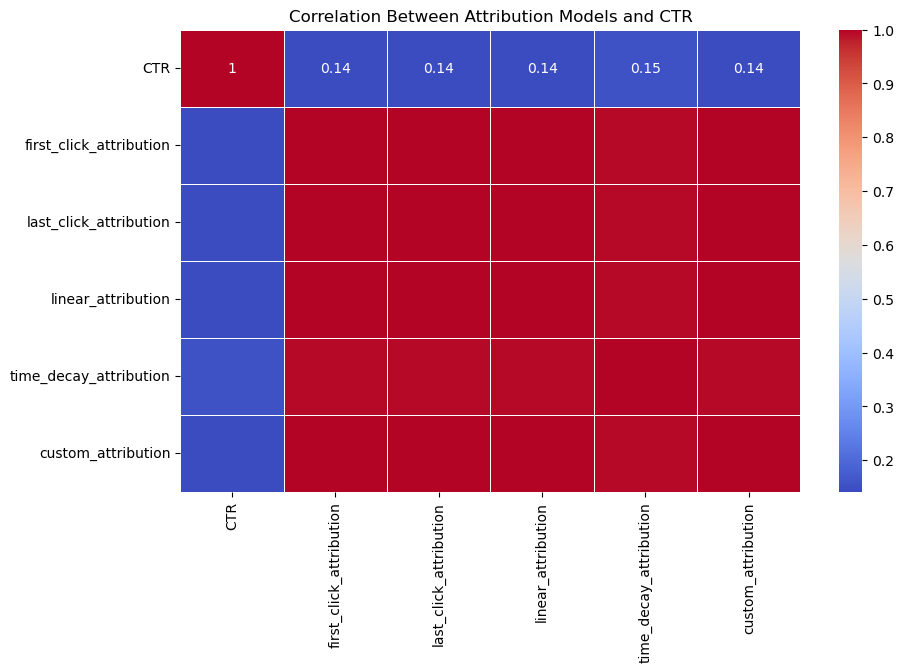

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_ctr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Between Attribution Models and CTR')
plt.show()

Correlation with CR:
                               CR  first_click_attribution  \
CR                       1.000000                 0.356486   
first_click_attribution  0.356486                 1.000000   
last_click_attribution   0.356486                 1.000000   
linear_attribution       0.356486                 1.000000   
time_decay_attribution   0.323859                 0.995330   
custom_attribution       0.356486                 1.000000   

                         last_click_attribution  linear_attribution  \
CR                                     0.356486            0.356486   
first_click_attribution                1.000000            1.000000   
last_click_attribution                 1.000000            1.000000   
linear_attribution                     1.000000            1.000000   
time_decay_attribution                 0.995330            0.995330   
custom_attribution                     1.000000            1.000000   

                         time_decay_attributio

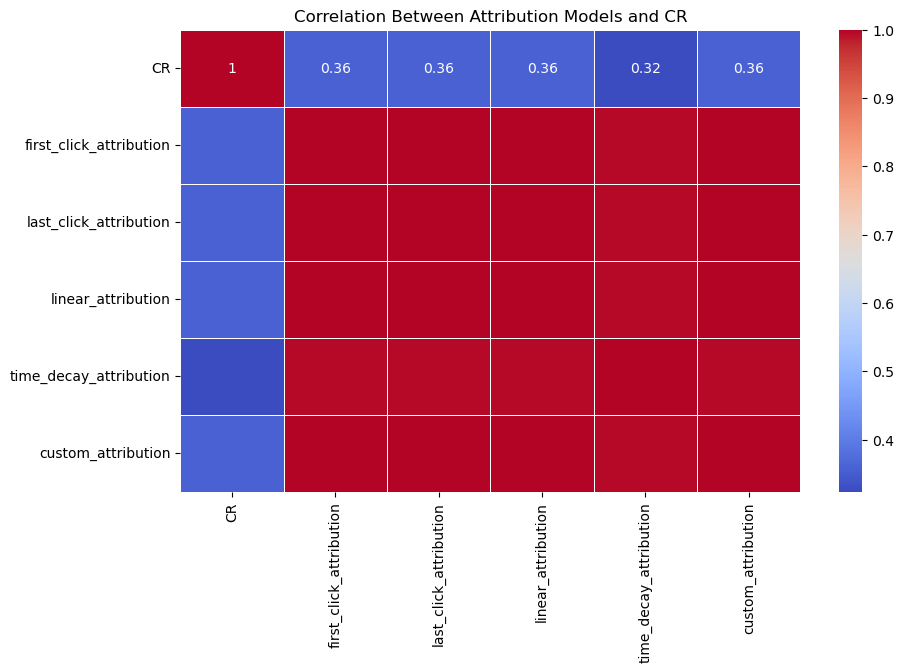

In [34]:
df_campaign_cr = df_criteo.groupby('campaign').agg(
    total_conversions=('conversion', 'sum'),
    total_clicks=('click', 'sum'),
    total_impressions=('uid', 'size')
).reset_index()

df_campaign_cr['CR'] = df_campaign_cr['total_conversions'] / df_campaign_cr['total_clicks']  # or use impressions

df_campaign_comparison = df_campaign_comparison.merge(df_campaign_cr[['campaign', 'CR']], on='campaign', how='left')


correlation_with_cr = df_campaign_comparison[['CR', 'first_click_attribution', 'last_click_attribution', 'linear_attribution', 'time_decay_attribution', 'custom_attribution']].corr()

print("Correlation with CR:")
print(correlation_with_cr)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_cr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Between Attribution Models and CR')
plt.show()